In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
fb_data = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb_data.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [28]:
earthquakes_data = pd.read_csv('data/earthquakes.csv')
earthquakes_data.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.


<Axes: title={'center': 'Rolling 20-day Minimum of Facebook Closing Price'}, xlabel='date'>

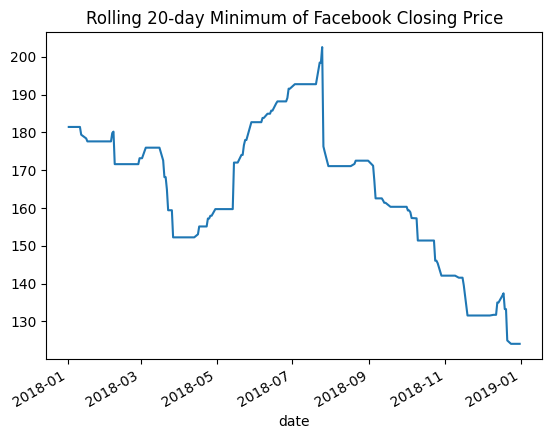

In [29]:
fb_data['close'].rolling('20D').min().plot(title='Rolling 20-day Minimum of Facebook Closing Price')

2. Create a histogram and KDE of the change from open to close in the Facebook stock price.


<Axes: title={'center': 'Histogram and KDE of the Change from Open to Close in the Facebook Stock Price'}, ylabel='Density'>

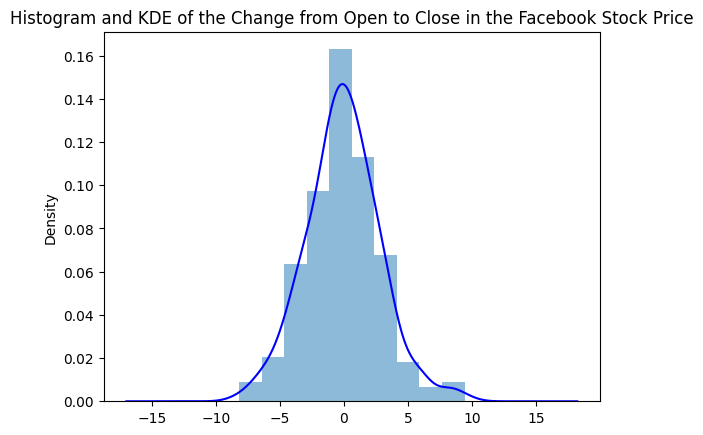

In [30]:
price_diff = fb_data['open'] - fb_data['close']

ax = price_diff.plot(
    kind='hist', 
    density=True,
    alpha=0.5, 
    title="Histogram and KDE of the Change from Open to Close in the Facebook Stock Price"
)

price_diff.plot(
    ax=ax,
    kind='kde',
    color='blue'
)

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.


Text(0.5, 1.0, 'Magnitude of each magType used in Indonesia')

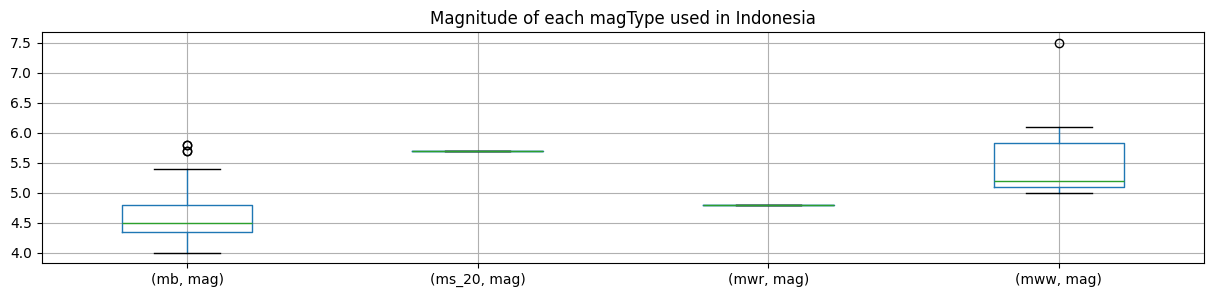

In [31]:
indonesia_data = earthquakes_data[earthquakes_data['parsed_place'] == 'Indonesia']

indonesia_data[['mag', 'magType']].groupby(
    'magType'
).boxplot(
    figsize=(15, 3), 
    subplots=False,
)

plt.title('Magnitude of each magType used in Indonesia')

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.


<Axes: title={'center': 'Difference between Weekly Maximum High Price and Weekly Minimum Low Price for Facebook'}, xlabel='date'>

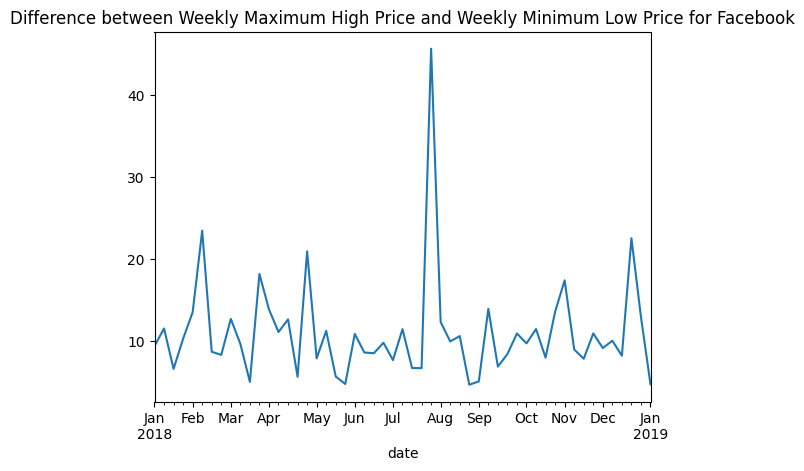

In [32]:
fb_data.resample('1W').agg({
    'high': 'max',
    'low': 'min'
}).assign(
    diff_price=lambda x: x['high'] - x['low']
).diff_price.plot(
    title='Difference between Weekly Maximum High Price and Weekly Minimum Low Price for Facebook'
)

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

   a. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price.

   b. The second subplot will be a bar plot showing the net effect this had monthly, using resample().

   c. Bonus#1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

   d. Bonus#2: Modify the x-axis of the bar plot to show the three letter abbreviation for the month.


C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_59260\1229439992.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = daily_diff.resample('1M').sum()


<Axes: title={'center': 'Monthly Effect of Daily Difference'}, xlabel='date'>

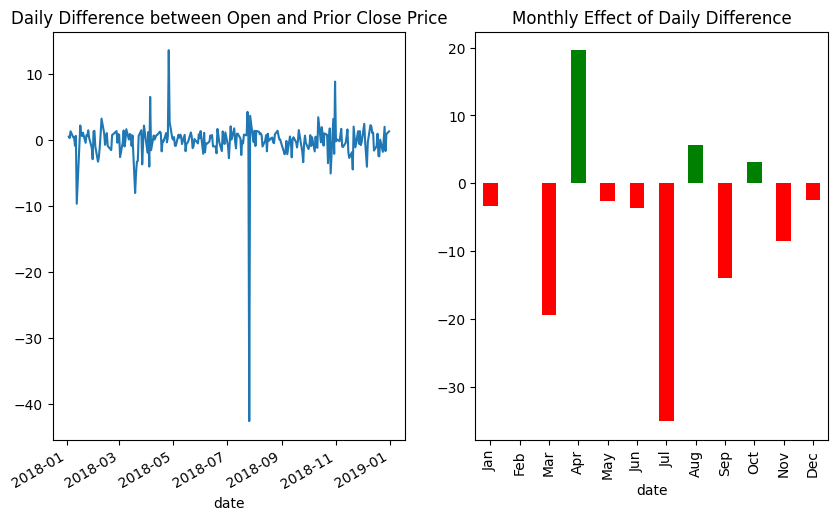

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

daily_diff = fb_data['open'] - fb_data['close'].shift()
daily_diff.plot(
    ax=axes[0],
    title='Daily Difference between Open and Prior Close Price'
)

monthly_effect = daily_diff.resample('1M').sum()
monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar',
    color=np.where(monthly_effect >= 0, 'green', 'red'),
    title='Monthly Effect of Daily Difference'
)
